In [1]:
# import the library
%matplotlib inline

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# sklearn :: utils
from sklearn.model_selection import train_test_split

# sklearn :: models
from sklearn.linear_model import LinearRegression

# sklearn :: evaluation metrics
from sklearn.metrics import mean_squared_error

sns.set_style('whitegrid')

# Problem definition

Apply regression models to predict Airbnb prices

# Load the data

In [2]:
df_train = pd.read_csv('data/train.csv')
df_test = pd.read_csv('data/test.csv')
print(df_train.shape, df_test.shape)

(51000, 29) (23111, 28)


# Feature Engineering 

Index(['id', 'log_price', 'property_type', 'room_type', 'amenities',
       'accommodates', 'bathrooms', 'bed_type', 'cancellation_policy',
       'cleaning_fee', 'city', 'description', 'first_review',
       'host_has_profile_pic', 'host_identity_verified', 'host_response_rate',
       'host_since', 'instant_bookable', 'last_review', 'latitude',
       'longitude', 'name', 'neighbourhood', 'number_of_reviews',
       'review_scores_rating', 'thumbnail_url', 'zipcode', 'bedrooms', 'beds'],
      dtype='object')
                 id     log_price  accommodates     bathrooms      latitude  \
count  5.100000e+04  51000.000000  51000.000000  51000.000000  51000.000000   
mean   1.127396e+07      4.778693      3.153725      1.231814     38.452159   
std    6.071084e+06      0.714838      2.165303      0.577935      3.077453   
min    3.440000e+02      0.000000      1.000000      0.000000     33.338905   
25%    6.311556e+06      4.304065      2.000000      1.000000     34.128569   
50%    1.

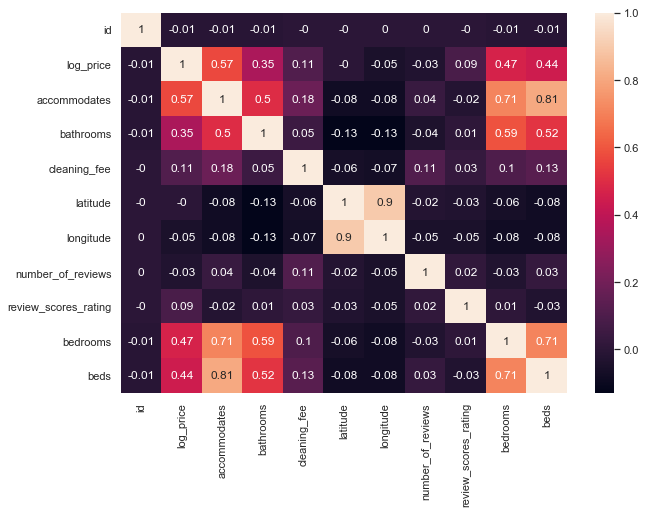

In [3]:
print(df_train.columns)
df_train.head()






## Populate blank fields
df_train['bathrooms'].fillna(1, inplace=True)

#########Added for validations
print(df_train.describe())
print(df_train.count())
# Verify group for any null values
print("")
print("(Number of Blank values)")
print("")
print(df_train.isnull().sum())


print("(---DF_TRAIN---)")
print(df_train.dtypes)
print(df_train.shape)
print(df_train.describe())
print('Corr:',df_train.corr())

print("(---DF_TEST---)")
print(df_test.dtypes)
print(df_test.shape)
print(df_test.describe())
print('Corr:',df_test.corr())


#df_train['zipcode']=df_train['zipcode'].strip()
#print('I am here----------------------------------------------------------------')
#print(df_train['zipcode'])
#print(df_train['zipcode'].str.contains('.0'))
#df_train['zipcode'] = df_train['zipcode'].str.replace('.0','')
#df_train['zipcode'] = df_train['zipcode'].str.replace('\r','')
#df_train['zipcode'] = df_train['zipcode'].str.replace('\n','')


#df_train['zipcode']=df_train['zipcode'].str.strip()
#print(df_train['zipcode'])


# heatmap
#corrmat = df_train.corr()
#f, ax = plt.subplots(figsize=(10, 7))
#sns.heatmap(corrmat, vmax=.8, square=True)
#plt.show()



sns.set(rc={'figure.figsize':(10,7)})
correlation_matrix = df_train.corr().round(2)
# annot = True to print the values inside the square
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

In [4]:

#New Section



#print(df_train['Kitchen'])


#df_zipcode = pd.get_dummies(df_train['zipcode'])
#df_train = pd.concat([df_train, df_zipcode], axis=1)
#df_train.head()

#print("(---DF_TRAIN---)")
df_room_type = pd.get_dummies(df_train['room_type'])
df_train = pd.concat([df_train, df_room_type], axis=1)
#df_train.head()

df_city = pd.get_dummies(df_train['city'])
df_train = pd.concat([df_train, df_city], axis=1)
#df_train.head()

#df_neigh = pd.get_dummies(df_train['neighbourhood'])
#df_train = pd.concat([df_train, df_neigh], axis=1)


##############TEST


#df_zipcode = pd.get_dummies(df_test['zipcode'])
#df_test = pd.concat([df_test, df_zipcode], axis=1)


#print("(---DF_TEST---)")
df_room_type = pd.get_dummies(df_test['room_type'])
df_test = pd.concat([df_test, df_room_type], axis=1)
#df_train.head()

df_city = pd.get_dummies(df_test['city'])
df_test = pd.concat([df_test, df_city], axis=1)
#df_test.head()

#df_neigh = pd.get_dummies(df_test['neighbourhood'])
#df_test = pd.concat([df_test, df_neigh], axis=1)






In [5]:

#Validate neighbourhood
#np.where(df_train['neighbourhood'])
#print(np.where(df_train['neighbourhood'].str.contains('md'))

#print(df_train.neighbourhood.str.contains("'"))
#df_train['neighbourhood'].fillna(1, inplace=True)




#print(df_train['zipcode'])

#df_train['zipcode'].fillna('00000', inplace = True)

#df_train['zipcode']=df_train['zipcode'].str.strip()
#print(df_train['zipcode'].dtype)



In [6]:
#Try to retrieve amenities
#df_kitchen = df_train.loc[df_train['amenities'].str.contains('Kitchen')]

#print(df_kitchen)

#df_train['review_scores_rating'] = np.where(df_train['number_of_reviews'] == 0,0)
#df_train['review_scores_rating'] = np.where(df_train['number_of_reviews'] == 0, 0, 1)

# IF NUmber of reviews is 0 Then 0% rating
df_train['review_scores_rating'] = np.where(df_train['number_of_reviews']==0, 0, df_train['review_scores_rating'])
#print(df_train['review_scores_rating'])
#print(df_train['review_scores_rating'].isnull().sum())


#df_train['review_scores_rating'].fillna(1, inplace=True)

#f['Amenities_2'] = np.where(df_train['amenities'].str.contains('Kitchen'),1)

#If kitchen exists retrieve
# df_train['Amenities_2'] = np.where(df_train['amenities'].str.contains('Kitchen'), 1, 0)
# print(df_train['Amenities_2'])
# print(df_train.describe())

df_train['Kitchen'] = np.where(df_train['amenities'].str.contains('Kitchen'), 'Yes', 'No')
print(df_train['Kitchen'])
print(df_train.describe())

df_kitchen = pd.get_dummies(df_train['Kitchen'])
df_train = pd.concat([df_train, df_kitchen], axis=1)
df_train.head()

print("(Number of Blank values)")
print("")
print(df_train.isnull().sum())

#Air Conditioning
df_train['AC'] = np.where(df_train['amenities'].str.contains('Air cond'), 'Yes', 'No')
print(df_train['AC'])
print(df_train.describe())

df_ac = pd.get_dummies(df_train['AC'])
df_train = pd.concat([df_train, df_ac], axis=1)
df_train.head()





###### TEST
df_test['Kitchen'] = np.where(df_test['amenities'].str.contains('Kitchen'), 'Yes', 'No')
print(df_test['Kitchen'])
print(df_test.describe())

df_kitchen = pd.get_dummies(df_test['Kitchen'])
df_test = pd.concat([df_test, df_kitchen], axis=1)
df_test.head()

print("(Number of Blank values)")
print("")
print(df_test.isnull().sum())


#Air Conditioning
df_test['AC'] = np.where(df_test['amenities'].str.contains('Air cond'), 'Yes', 'No')
print(df_test['AC'])
print(df_test.describe())

df_ac = pd.get_dummies(df_test['AC'])
df_test = pd.concat([df_test, df_ac], axis=1)
df_test.head()



0        Yes
1        Yes
2        Yes
3        Yes
4         No
5        Yes
6        Yes
7        Yes
8        Yes
9        Yes
10       Yes
11       Yes
12       Yes
13       Yes
14       Yes
15       Yes
16       Yes
17       Yes
18       Yes
19       Yes
20        No
21        No
22       Yes
23       Yes
24       Yes
25       Yes
26       Yes
27       Yes
28       Yes
29       Yes
        ... 
50970    Yes
50971    Yes
50972    Yes
50973    Yes
50974    Yes
50975    Yes
50976    Yes
50977    Yes
50978    Yes
50979    Yes
50980    Yes
50981    Yes
50982    Yes
50983    Yes
50984     No
50985    Yes
50986    Yes
50987    Yes
50988    Yes
50989    Yes
50990    Yes
50991    Yes
50992    Yes
50993    Yes
50994    Yes
50995    Yes
50996    Yes
50997    Yes
50998     No
50999    Yes
Name: Kitchen, Length: 51000, dtype: object
                 id     log_price  accommodates     bathrooms      latitude  \
count  5.100000e+04  51000.000000  51000.000000  51000.000000  51000.000000   
mean 

0        Yes
1        Yes
2        Yes
3        Yes
4        Yes
5        Yes
6        Yes
7        Yes
8        Yes
9        Yes
10        No
11       Yes
12       Yes
13       Yes
14       Yes
15       Yes
16       Yes
17       Yes
18       Yes
19        No
20       Yes
21       Yes
22       Yes
23       Yes
24       Yes
25       Yes
26       Yes
27        No
28       Yes
29       Yes
        ... 
23081    Yes
23082     No
23083    Yes
23084    Yes
23085    Yes
23086    Yes
23087    Yes
23088    Yes
23089     No
23090    Yes
23091    Yes
23092    Yes
23093    Yes
23094    Yes
23095    Yes
23096     No
23097    Yes
23098    Yes
23099    Yes
23100    Yes
23101    Yes
23102    Yes
23103    Yes
23104    Yes
23105    Yes
23106    Yes
23107    Yes
23108    Yes
23109    Yes
23110    Yes
Name: Kitchen, Length: 23111, dtype: object
                 id  accommodates     bathrooms      latitude     longitude  \
count  2.311100e+04  23111.000000  23044.000000  23111.000000  23111.000000   
mean 

,id,property_type,room_type,amenities,accommodates,bathrooms,bed_type,cancellation_policy,cleaning_fee,city,...,DC,LA,NYC,SF,Kitchen,No,Yes,AC,No,Yes
0,986942,Apartment,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",2,1.0,Real Bed,flexible,False,NYC,...,0,0,1,0,Yes,0,1,Yes,0,1
1,16436737,House,Private room,"{Internet,""Wireless Internet"",""Air conditionin...",4,1.5,Real Bed,moderate,True,DC,...,1,0,0,0,Yes,0,1,Yes,0,1
2,18209634,Apartment,Private room,"{TV,""Cable TV"",""Wireless Internet"",""Air condit...",1,1.0,Real Bed,flexible,True,NYC,...,0,0,1,0,Yes,0,1,Yes,0,1
3,15027024,Apartment,Private room,"{TV,""Wireless Internet"",""Air conditioning"",Kit...",2,1.0,Real Bed,flexible,False,NYC,...,0,0,1,0,Yes,0,1,Yes,0,1
4,18074243,Apartment,Entire home/apt,"{TV,""Cable TV"",Internet,""Wireless Internet"",""A...",6,1.0,Real Bed,strict,True,NYC,...,0,0,1,0,Yes,0,1,Yes,0,1


In [7]:
# select the columns
#X_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds', 'review_scores_rating']
# X_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds']+ list(df_room_type.columns) + list(df_city.columns)#list(df_zipcode.columns)
#X_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds','number_of_reviews']+ list(df_room_type.columns) + list(df_city.columns) + list(df_kitchen.columns) #+ list(df_zipcode.columns) 
 
#X_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds']+ list(df_room_type.columns) +  list(df_kitchen.columns) #+ list(df_zipcode.columns) 
X_columns = ['accommodates', 'bathrooms', 'bedrooms', 'beds']+ list(df_room_type.columns) + list(df_city.columns) + list(df_kitchen.columns) #+ list(df_zipcode.columns)#+ list(df_neigh.columns)  #+ list(df_zipcode.columns)


y_column = ['log_price']

In [8]:
# handle missing values
df_train = df_train[X_columns + y_column]
print(df_train.shape)
df_train = df_train.fillna(0.0) # probably not a good idea for 'review_scores_rating'
print(df_train.shape)

(51000, 18)
(51000, 18)


# Model Training

In [9]:
# split the data using sklearn

threshold = 0.8
X = df_train[X_columns]
y = df_train[y_column]


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=1.0-threshold, shuffle=True)

print('X_train', X_train.shape)
print('y_train', y_train.shape)
print('X_test', X_test.shape)
print('y_test', y_test.shape)




X_train (40800, 17)
y_train (40800, 1)
X_test (10200, 17)
y_test (10200, 1)


In [10]:
# train a linear regression
model = LinearRegression()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)

# Model Evaluation

RMSE 0.49


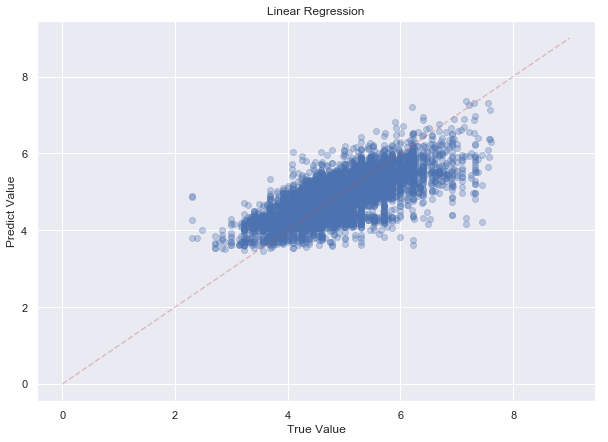

In [11]:
rmse = np.sqrt(mean_squared_error(y_test, y_pred))
print('RMSE', round(rmse, 2))
plt.scatter(y_test, y_pred, alpha=0.3)
plt.plot(range(0,10), range(0,10), '--r', alpha=0.3, label='Line1')
plt.title('Linear Regression')
plt.xlabel('True Value')
plt.ylabel('Predict Value')
plt.show()

# Prepare submission

In [12]:
#print(X_columns)

df_prediction = df_test[X_columns].fillna(0.0)
df_test['log_price'] = model.predict(df_prediction)
df_test[['id', 'log_price']]

,id,log_price
0,986942,4.338379
1,16436737,4.572998
2,18209634,4.260864
3,15027024,4.338379
4,18074243,5.329712
5,8446914,5.346191
6,19362916,4.402954
7,16116059,5.426025
8,20912583,4.227417
9,13573101,5.016357


In [13]:
df_test[['id', 'log_price']].to_csv('submission_linear_regression.csv', index=False)